In [123]:
#Loading all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#Loading the Data
Train_data = pd.read_csv("./Data/train.csv")
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Analysis

In [125]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- The info about the data shows some null values in the "Age" , "Cabin" , "Embarked" column

In [126]:
Train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
print(Train_data.shape) # checking the dimension of the dataframe
print("Number of Rows ->",Train_data.shape[0])
print("Number of Columns ->",Train_data.shape[1])

(891, 12)
Number of Rows -> 891
Number of Columns -> 12


In [128]:
# Checking the total number of Null or Nan values in each Column
Train_data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are 3 Features "Age" , "Cabin" and "Embarked" which have Nan values

In [129]:
print("Count of Null Values in Age feature : " ,Train_data["Age"].isnull().sum())
print("Count of Null Values in Cabin feature : " ,Train_data["Cabin"].isnull().sum())
print("Count of Null Values in Embarked feature : " ,Train_data["Embarked"].isnull().sum())

Count of Null Values in Age feature :  177
Count of Null Values in Cabin feature :  687
Count of Null Values in Embarked feature :  2


In [130]:
pd.unique(Train_data["Sex"]) # checking the unique values of feature "Sex"

array(['male', 'female'], dtype=object)

In [131]:
Train_data[Train_data["Age"].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [132]:
#finding the mean or average of non-null values in the "Age" featuer
non_null_count = (Train_data["Age"].isnull() == False).sum()
avg_age = (Train_data["Age"][Train_data["Age"].isnull() == False].sum())/non_null_count
print(avg_age)

29.69911764705882


In [133]:
#finding the unique values in the "Cabin" feature
display(pd.unique(Train_data["Cabin"]))
print("Total unique values in the cabin feature" ,len(pd.unique(Train_data["Cabin"])))

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Total unique values in the cabin feature 148


In [134]:
pd.unique(Train_data["Embarked"])#finding the unique values in the "Cabin" feature

array(['S', 'C', 'Q', nan], dtype=object)

In [135]:
# Counting the Occurence of each of the values ['S', 'C', 'Q', nan] in the "Embarked" feature
print("Occurence of the value:'S' in the Embarked feature :", (Train_data["Embarked"] == 'S').sum())
print("Occurence of the value:'C' in the Embarked feature :", (Train_data["Embarked"] == 'C').sum())
print("Occurence of the value:'Q' in the Embarked feature :", (Train_data["Embarked"] == 'Q').sum())
print("Occurence of the value:'nan' in the Embarked feature :", (Train_data["Embarked"].isna()).sum())



Occurence of the value:'S' in the Embarked feature : 644
Occurence of the value:'C' in the Embarked feature : 168
Occurence of the value:'Q' in the Embarked feature : 77
Occurence of the value:'nan' in the Embarked feature : 2


- The "Cabin" feature is not required ,as it contains a lot of different values and a huge number of Null values , so dropping "Cabin" feature.
- The "Embarked" feature might be required as it has only 3 unique values and 2 Null values , if not needed we will drop it later.
- The "Age" feature might be an effecting feature for the target "Survived" , so we should try using it.
- The "Age" feature has 177 Null(NaN) values , which can be managed with average values.
- The "Sex" feature might also be an effecting feature for the target "Survived" , so we can to use it

#### Feature Engineering

In [136]:
# creating copy of Train Data
new_Data = Train_data.copy()

In [137]:
new_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
display(pd.unique(Train_data["Name"]))
print("Total number of  unique values in Name feature ->" , len(pd.unique(Train_data["Name"])))

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

Total number of  unique values in Name feature -> 891


In [140]:
print("Total number of  unique values in Name feature ->" , len(pd.unique(Train_data["PassengerId"])))


Total number of  unique values in Name feature -> 891


In [141]:
print("Total number of  unique values in Name feature ->" , len(pd.unique(Train_data["Ticket"])))

Total number of  unique values in Name feature -> 681


- "Name" column has all unique values and object type so not required as a feature
- "Passenger" Column has all unique values so no requirement as a feature
- "Cabin" column is also not required.
- "Ticket" feature is also not required because these random generated strings

In [142]:
new_Data = new_Data.drop(columns=["PassengerId" , "Name" , "Cabin" , "Ticket"])
new_Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [143]:
new_Data["Sex"].isnull().sum()

0

In [138]:
# These two ways are not right because it repots Warning
# new_Data["Sex"][new_Data["Sex"] == "female"] = 1
# new_Data["Sex"][new_Data.loc[ : , "Sex"] == "male"] = 0

In [144]:
# new_Data.iloc[1:10]
gender_map = {'female': 1, 'male': 0}
new_Data["Sex"] = new_Data["Sex"].map(gender_map) # map female as 1 and male as 0

In [147]:
# Filling the null values with the letter 'S' in Column Embarked

# new_data['Embarked'] = np.where(new_data['Embarked'].isnull(), 'S', new_data['Embarked']) #another approch 

new_Data["Embarked"] = new_Data["Embarked"].fillna('S')


In [150]:
pd.unique(new_Data["Embarked"])

array(['S', 'C', 'Q'], dtype=object)

In [151]:
# mapping 'S' as 1 , 'Q' as 2 and 'C' as 3
embark_map = {'S': 1, 'Q': 2 , "C" : 3}
new_Data["Embarked"] = new_Data["Embarked"].map(embark_map)

In [152]:
new_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,3
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [153]:
new_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [162]:
data_columns = new_Data.select_dtypes([float,int]).columns.tolist() # extracting the features which have datatype as int64 and float64
# print(type(data_columns))
print(data_columns)
correlation_matrix = new_Data[data_columns].corr() #calculating correslation between each feature with other features

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [164]:
print(correlation_matrix)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age      -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp    -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked  0.167675 -0.162098  0.108262  0.030394 -0.068230 -0.039798   

              Fare  Embarked  
Survived  0.257307  0.167675  
Pclass   -0.549500 -0.162098  
Sex       0.182333  0.108262  
Age       0.096067  0.030394  
SibSp     0.159651 -0.068230  
Parch     0.216225 -0.039798  
Fare      1.000000  0.224719  
Embarked  0.224719  1.000000  


<Axes: >

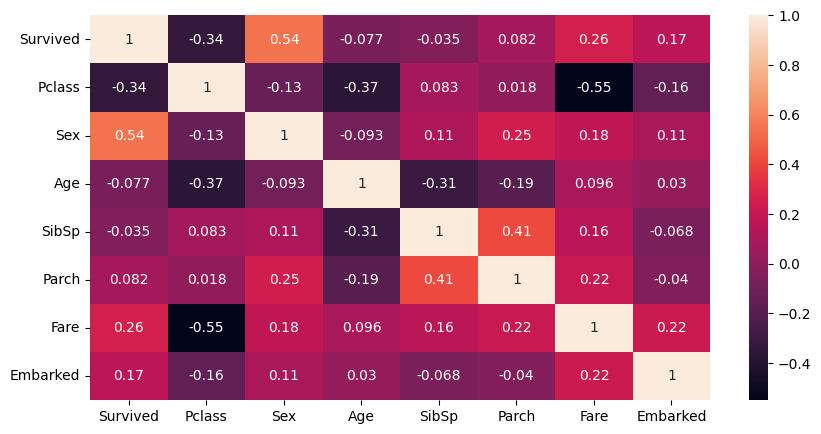

In [174]:
# visualizing the correlation matrix using the Heatmap 
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(correlation_matrix , annot=True )

- The above correlation Matrix shows 'Sex' feature is more positively correlated with target 'Survived'
- and the 'Pclass' is more negatively related to target 'Survived'